In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Reshape





In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
# Distribuição das variáveis
df.hist(figsize=(15, 15))
plt.show()




In [ ]:

# Separando dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(df.drop("Class", axis=1), df["Class"], test_size=0.25)

# Normalização das variáveis numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [ ]:
X_train.shape

(7500, 12)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
#MODELO NOVO
# Ajustando a criação do modelo para Conv1D
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation="relu", input_shape=(30, 1)))  # Ajustado para 30 timesteps
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(rate=0.2))
model.add(Dense(units=1, activation="sigmoid"))

# Compilando o modelo
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Ajustando os dados para a forma correta
X_train_reshaped = X_train.reshape(-1, 30, 1)  # Agora corresponde ao input_shape

# Treinando o modelo
model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128)

# Avaliando o modelo
X_test_reshaped = X_test.reshape(-1, 30, 1)
score = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f"Acurácia: {score[1] * 100:.2f}%")

# Salvando o modelo
model.save("modelo_marketing.h5")


Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7043 - loss: 0.6075 - val_accuracy: 0.6892 - val_loss: 0.6227
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6977 - loss: 0.6123 - val_accuracy: 0.6892 - val_loss: 0.6234
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7062 - loss: 0.6025 - val_accuracy: 0.6892 - val_loss: 0.6238
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7059 - loss: 0.6040 - val_accuracy: 0.6892 - val_loss: 0.6245
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6937 - loss: 0.6133 - val_accuracy: 0.6892 - val_loss: 0.6234
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7008 - loss: 0.6059 - val_accuracy: 0.6892 - val_loss: 0.6253
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7043 - loss: 0.6038 - val_accuracy: 0.6892 - val_loss: 0.6254
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7003 - loss: 0.6078 - val_accuracy: 0.6892 - val_lo

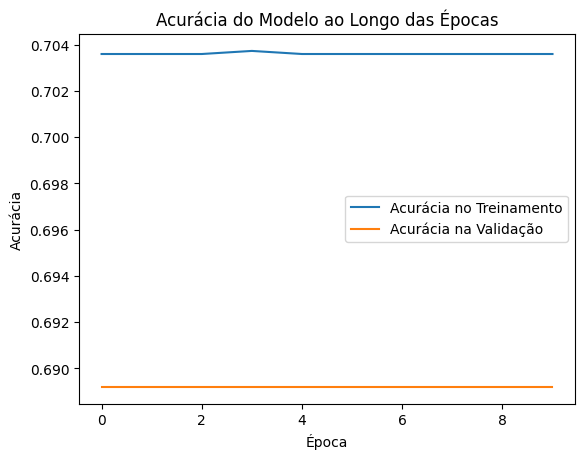

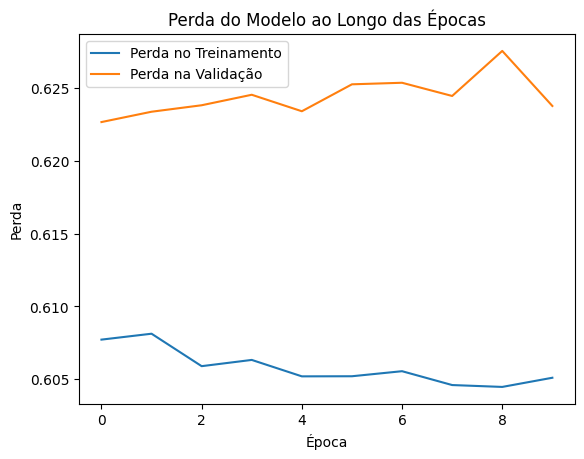

In [ ]:
import matplotlib.pyplot as plt

# Supondo que você armazene o histórico do treinamento na variável 'history'
# Se você ainda não o fez, modifique a chamada model.fit para fazer isso:
history = model.fit(X_train_reshaped, y_train, epochs=10, batch_size=128, validation_data=(X_test.reshape((X_test.shape[0], X_test.shape[1], 1)), y_test), verbose=1)

# Plotando a acurácia de treinamento e validação
plt.plot(history.history['accuracy'], label='Acurácia no Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia na Validação')
plt.title('Acurácia do Modelo ao Longo das Épocas')
plt.ylabel('Acurácia')
plt.xlabel('Época')
plt.legend()

plt.figure()

# Plotando a perda de treinamento e validação
plt.plot(history.history['loss'], label='Perda no Treinamento')
plt.plot(history.history['val_loss'], label='Perda na Validação')
plt.title('Perda do Modelo ao Longo das Épocas')
plt.ylabel('Perda')
plt.xlabel('Época')
plt.legend()

plt.show()


In [ ]:
df1 = pd.read_csv('marketing_campaign.csv',delimiter = ';')

In [ ]:
df1.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')